# __Unsupervised Learning__

# __Agenda__

- Introduction to Unsupervised Learning
  - What Is Unsupervised Learning?
  - Approaches to Unsupervised algorithm (Clustering, Dimensionality Reduction, Association rule )
- Clustering Techniques
  - Overview of Clustering
  - K-Means Clustering:
    - Algorithm and Implementation
    - Choosing the Number of Clusters (Elbow Method, Silhouette Score)
  - Hierarchical Clustering:
    - Agglomerative vs. Divisive Methods
    - Dendrograms and Linkage Criteria
  - DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

## __6.1. Introduction to Unsupervised Learning__

### __6.1.1 What Is Unsupervised Learning__
Unsupervised learning is a machine learning type where the model learns from unlabeled data to find patterns within it.

- It deals with unlabeled datasets.
- It enables algorithms to work independently to discover hidden information or pattern in the data without guidance.
- It classifies unsorted information according to patterns, differences, or similarities.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/unsupervised_learning.png)

Example: A data scientist inputs information about elderly people admitted to the hospital. The algorithm receives no external input to influence categorization.


Unsupervised learning algorithms are used to detect the following in the data:
- Patterns
- Differences
- Similarities


Categorization of the given data can be based on age, average time spent in the hospital, and the types of diseases patients suffer from.

The final categorization of a dataset aids in deriving conclusions based on different patterns generated from the data.



Clusters formed according to the dataset yield the following inferences:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/ul_example.png)

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/ul_example_classifier.png)

- Three clusters are formed based on the average time spent in the hospital.


- The death rate for patients suffering from cancer and heart disease  decreased after 1970.

- The average hospital stay duration has decreased.


- Life expectancy for a 65-year-old is higher today compared to earlier years.

- A decreasing death rate indicates progress in medical science.


In unsupervised learning, the model derives insights from the data without being taught anything.
- It uncovers several previously unknown patterns in the dataset.
- It helps in finding features that may be useful for categorization.


### __6.1.2 Approaches to Unsupervised Algorithm__

There are several approaches to unsupervised learning, each suited to different tasks:



1. **Clustering:** This is a popular approach that groups data points into clusters based on their similarities. Common clustering algorithms include k-means, hierarchical clustering, and density-based clustering like DBSCAN.

2. **Dimensionality reduction:** This approach aims to reduce the number of features in a dataset while preserving the essential information. This can be useful for visualization and improving the efficiency of other machine learning algorithms. Principal component analysis (PCA) is a widely used dimensionality reduction technique.

3. **Association rule learning:** This approach discovers relationships between different variables in a large dataset. It helps identify items that frequently appear together, which can be valuable for tasks like market basket analysis. The Apriori algorithm is a common example of this approach.

  *Market basket analysis* is a data mining technique used by retailers to discover relationships between items that people buy together frequently. It's often leveraged in retail sales to identify strong correlations between products. A famous example of market basket analysis is the "diapers and beer" story, where it was found that these two products were often purchased together, leading to marketing strategies that placed these items closer to encourage further sales.

4. **Outlier detection algorithms:** KNN outlier detection and isolation forests


### Let's understand each approach in detail one-by-one.

## __6.2 Clustering Techniques__

### __6.2.1 Overview of Clustering__

Clustering is a technique in unsupervised learning where data points are grouped together based on their similarities, aiming to discover inherent patterns or structures within the data.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/clustering.png)

- Clustering techniques divide a set of data points into multiple clusters, ensuring similarity within each cluster.
- Its goal is to segregate data points with similar traits.



The most common clustering algorithms used in unsupervised learning are:
- K-means clustering
- K-medoids
- Agglomerative clustering
- Density-based spatial clustering of applications with noise (DBSCAN)

**Let's understand the K-means clustering algorithm and its implementation.**

### __6.2.2 K-Means Clustering__

K-means clustering is an unsupervised machine learning algorithm that partitions data into k clusters by minimizing the within-cluster variance.

- It groups unlabeled data into clusters by identifying the k number of centroids.
- It assigns every data point to the closest cluster by calculating and using the pairwise Euclidean distance between points.


Let us understand the workings of a k-means algorithm with the help of a flow chart.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/Unsupervised.png)

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/K_means.png)

Step 1. Select the number of clusters, k (e.g., k = 2 for demonstration).

Step 2. Select k random points from the dataset as the initial centroids.

Step 3. Calculate the Euclidean distance from each data point to each centroid.

Step 4. Assign each data point to the nearest cluster centroid based on the calculated distances.

Step 5. Recalculate the centroids of each cluster as the mean of all points assigned to that cluster.

Step 6. Reassign each data point to the nearest centroid. If no data points change their cluster assignments or a maximum number of iterations is reached, stop; otherwise, return to Step 5.

## **K-Means: Mathematical Representation**


K-Means objective minimizes the total distortion (sum of distances of points from their cluster centers).

The objective function for k-means is as follows:
$$J(\mu ,r) = \sum_{n=1}^{N}\sum_{k=1}^{K}r_{nk}||X_n − \mu_k ||^2$$

* µ1, . . . , µK are the K cluster centroids (means).
* $r_{nk}$ ∈ {0, 1} are indicators denoting whether point $x_n$ belong to cluster k.

**Now, let's see the implementation of the K-means clustering model.**

- Import **pandas, NumPy, matplotlib, and KMeans** from sklearn.
- Load the Mall_customers.csv dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/mall_customers.csv')

In [3]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


__Observation:__
- Here, you have the age, gender, income, and spending score of the customers.

## We decide to use 2 features only
- Extract the relevant features `Annual Income (k$)` and `Spending Score (1-100)` from the dataset.


In [4]:
df[['Annual Income (k$)', 'Spending Score (1-100)']].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [6]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

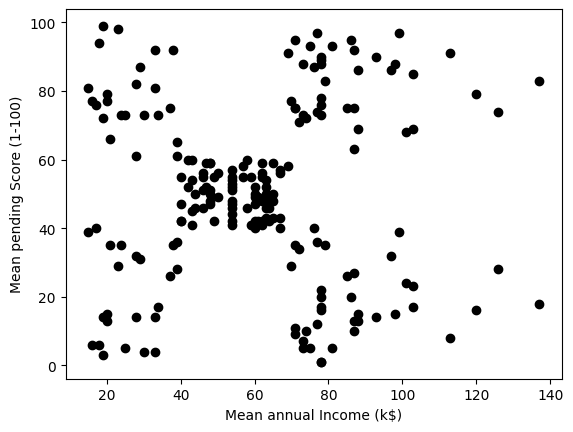

In [7]:
plt.scatter(X[:,0],X[:,1],c = 'black')

plt.xlabel('Mean annual Income (k$)')
plt.ylabel('Mean pending Score (1-100)')
#plt.legend()
plt.show()

In [8]:
from sklearn.cluster import KMeans

### __First example: Run K-Means with 3 clusters__

In [9]:
# Declare:
km = KMeans(n_clusters=3)

In [10]:
# Fit
km.fit(X)

KMeans(n_clusters=3)

__Remark: upon training, three clusters are formed and called (i.e. numbered as) 0, 1 and 2.__
__Each sample is assigned a cluster (i.e. a cluster number).__

In [11]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

In [12]:
# Show the cluster numbers, called "labels".
km.labels_[:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [13]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [14]:
# See the cluster numbers
print(set(km.labels_))

{np.int32(0), np.int32(1), np.int32(2)}


In [15]:
df_clustered = df.copy()
df_clustered["cluster"] = km.labels_
df_clustered.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [16]:
df_clustered.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1
199,200,Male,30,137,83,2


In [17]:
# Show cluster centers (i.e. the centroids)
km.cluster_centers_

array([[44.15447154, 49.82926829],
       [87.        , 18.63157895],
       [86.53846154, 82.12820513]])

$$\textrm{Inertia} = \sum_{n=1}^{N}\sum_{k=1}^{K}r_{nk}||X_n − \mu_k ||$$

In [18]:
# Compute inertia metric = sum of the distances between the samples and their respective centroids
km.inertia_

106348.37306211118

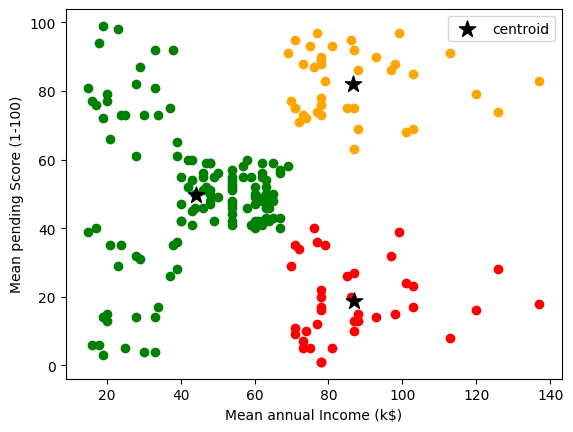

In [19]:
df1 = df_clustered[df_clustered.cluster==0]
df2 = df_clustered[df_clustered.cluster==1]
df3 = df_clustered[df_clustered.cluster==2]

plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='orange')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',s=150,marker='*',label='centroid')
plt.xlabel('Mean annual Income (k$)')
plt.ylabel('Mean pending Score (1-100)')
plt.legend()
plt.show()

### __Elbow method to find the optimal K__

- The elbow method involves plotting the number of clusters against the distortion or inertia to identify a significant flattening point, known as the elbow point.
- The elbow point represents a trade-off between capturing meaningful patterns and avoiding excessive complexity, indicating the optimal number of clusters.
- By choosing the value of k at the elbow point, you strike a balance between cluster quality and simplicity, resulting in a reasonable number of clusters.

**Steps to perform:**
- Calculate the WCSS (within-cluster sum of squares) for different numbers of clusters.
  - WCSS measures how compact a cluster is in k-means clustering. It calculates the total squared distance of all points within a cluster to their cluster's centroid. In simpler terms, it tells you how spread out the points are within a cluster.
  - The lower the WCSS, the closer the points are to their cluster's center.
- Plot the WCSS values to find the optimal number of clusters.


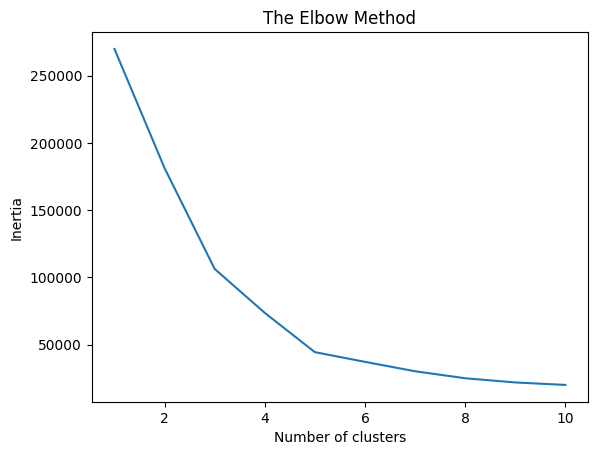

In [20]:
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, n_init=10, init = 'k-means++', random_state = 42)
    model.fit(X)
    wcss.append(model.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### __Observation__
In the plotted graph, identify where the WCSS graph starts to flatten out. The plot flattens at 5. Hence, the Optimal k is set to 5.

- Train the K-means model with the optimal number of clusters.


In [21]:
model = KMeans(n_clusters = 5, n_init=10, init = 'k-means++', random_state = 42)

In [22]:
# Fit
model.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=42)

- Plot the clusters and their centroids on a scatter plot.
- Assign the color for each point.
- Consider the title, xlabel, and ylabel.

In [23]:
y_kmeans=model.labels_
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [24]:
set(y_kmeans)

{np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4)}

In [25]:
# Show cluster centers
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [26]:
# Compute inertia metric
km.inertia_

106348.37306211118

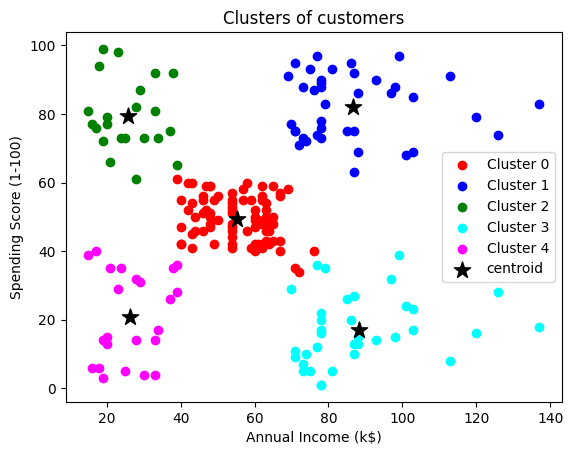

In [27]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'cyan', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'magenta', label = 'Cluster 4')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black',s=150,marker='*',label='centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### __Observation:__
- K-means clusters with K = 5.

**Interpretation of Each Cluster**

Cluster 0 (Red):

Positioned at lower annual income and moderate to high spending scores.
This cluster might represent customers who, despite having lower incomes, tend to spend a significant portion of their income.

Cluster 1 (Blue):

Middle to high annual income with the lowest spending scores among all clusters.
These customers are earning a good amount but are conservative in their spending habits.

Cluster 2 (Green):

Lower income and lower spending scores.
Represents a conservative customer group with limited financial flexibility.

Cluster 3 (Cyan):

Higher income and very high spending scores.
These are the premium customers who earn a lot and spend a lot, likely the target for high-end marketing campaigns.

Cluster 4 (Magenta):

High income but moderate spending scores.
Customers in this cluster have high earning potential but do not spend as extravagantly as those in Cluster 4.

### **Silhouette Score**

## Alternatively, you may use the "silhouette score" instead of the "inertia".

- Silhouette score measures how well data points fit their assigned cluster by considering both similarity within a cluster and separation between clusters.
- Measures the quality of clustering by comparing how similar an object is to its own cluster versus other clusters.
     - **Intra-cluster distance** is the average distance between points within the same cluster. A lower intra-cluster distance indicates that the cluster is more compact, which is generally desirable.
     - **Inter-cluster distance** measures the distance between clusters. Ideally, you want clusters to be as far apart as possible (high inter-cluster distance) to ensure that they are distinct from one another.

- The score ranges from -1 to 1.
  - **Close to 1:** Indicates that the object is well-clustered and appropriately assigned to its cluster.
  - **Close to 0:** Indicates that the object lies on or very close to the boundary between two clusters.
  - **Close to -1:** Indicates that the object is poorly clustered and may have been assigned to the wrong cluster.

**Note:**  The silhouette score is particularly useful for determining the optimal number of clusters k, in a dataset.

**Now, let's see the implementation of silhouette score.**

- Import **make_blobs and silhouette_score** from sklearn.
- Load the Mall_customers.csv dataset.


In [28]:
#from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import pandas as pd

In [29]:
df = pd.read_csv('./data/mall_customers.csv')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [30]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

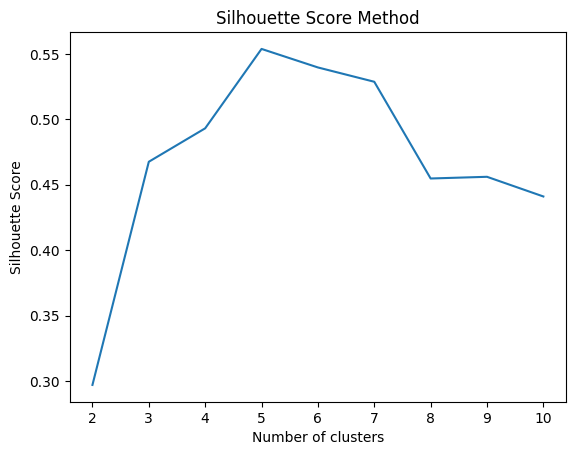

In [31]:
# Silhouette Score method
silhouette_scores = []
for i in range(2, 11):
    model = KMeans(n_clusters = i, n_init=10, init = 'k-means++', random_state = 42)
    model.fit(X)

    score = silhouette_score(X,model.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

- Train the K-means model with the optimal number of clusters.


#### __Observation__

**Choosing the Optimal Number of Clusters:**

From the plot, the optimal number of clusters k can be chosen based on the highest Silhouette Score. This score represents a balance between having clusters that are dense and well-separated from each other. Looking at the plot:

The Silhouette Score peaks at k=5. This suggests that the clusters are most distinct and appropriately separated when the data is divided into 5 clusters.

In [32]:
# Select the number of clusters with the highest silhouette score
optimal_clusters = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(optimal_clusters)

5


In [33]:
# Fit the model with the optimal number of clusters
model = KMeans(n_clusters=optimal_clusters, n_init=10, init='k-means++', random_state=42)

In [34]:
# Fit and store resulting labels
model.fit(X)
y_kmeans = model.labels_

# Equivalently, you could type y_kmeans = model.fit_predict(X)

- Plot the clusters and their centroids on a scatter plot.
- Assign the color for each point.
- Consider the title, xlabel, and ylabel.

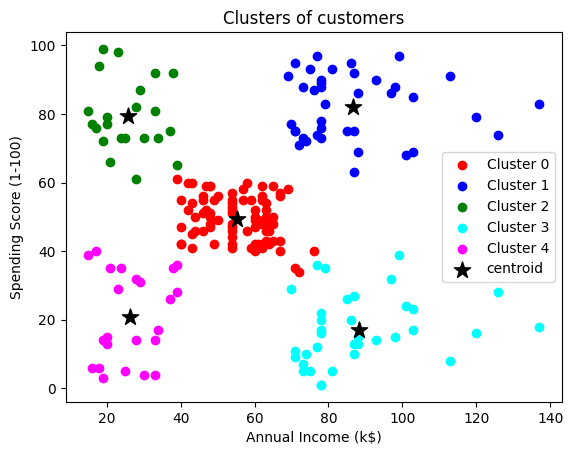

In [35]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'cyan', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'magenta', label = 'Cluster 4')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black',s=150,marker='*',label='centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

__Observation:__
- K-means clusters with K = 5.

In [36]:
print(silhouette_score(X,model.labels_))

0.553931997444648


### __6.2.3 Hierarchical Clustering__

Hierarchical clustering is a method that groups data points based on their similarity or distance. It assumes that data points that are close to each other are more similar or related than those that are farther apart.

Hierarchical clustering, unlike K-Means, does not require specifying the number of clusters in advance. It builds a hierarchy of clusters based on the similarity or distance between data points, capturing complex and nested cluster shapes. This method provides a detailed view of data relationships through a dendrogram, making it more flexible for exploring the data's structure.

It adopts either of the following approaches for grouping data:
- Agglomerative Hierarchical Cluster Analysis: Bottom-to-top approach
- Divisive Hierarchical Cluster Analysis: Top-to-bottom approach




#### __Dendrograms and Linkage Criteria in Hierarchical Clustering__
**Dendrograms:**
A dendrogram is a tree-like diagram that displays the relationships between similar objects. Each branch represents a category or class, and the entire diagram shows the hierarchical structure connecting all the categories or classes.

**Components of a Dendrogram**

- **Leaves (Terminal Nodes):** These represent the individual data points at the bottom of the dendrogram.
- **Branches (Internal Nodes):** These represent the clusters formed by merging or splitting. The height of the branches indicates the distance or dissimilarity between clusters.
- **Height:** The vertical axis of the dendrogram represents the distance or dissimilarity at which clusters are merged or split. A greater height indicates a higher dissimilarity.

**How to Read a Dendrogram**
- **Merging:** Starting from the leaves, data points that are close to each other are merged first, forming small clusters.
- **Splitting:** As you move up, these small clusters are further merged based on their distance or dissimilarity until all data points are combined into a single cluster at the root.
- **Cluster Formation:** By setting a threshold on the height, you can determine the number of clusters. Horizontal cuts across the dendrogram at a specific height level show the clusters formed at that dissimilarity level.

## <b> Distance Metric </b>
The method you use to calculate the distance between data points will affect the end result.
### <b>Euclidean Distance </b>
The shortest distance between two points. <br>
For example,
if x=(a,b) and y=(c,d), <br>
the Euclidean distance between x and y is √(a−c)²+(b−d)²
### <b> Manhattan Distance </b>
Imagine you were in the downtown center of a big city and you wanted to get from point A to point B. You wouldn’t be able to cut across buildings, rather you’d have to make your way by walking along the various streets. <br>
For example, if x=(a,b) and y=(c,d), <br>
the Manhattan distance between x and y is |a−c|+|b−d|

## <b> Linkage Criteria (= criteria to measure distances between sets)</b>
It determines how the distance between clusters is calculated during the merging process. Different linkage methods can result in different clustering outcomes.

**Common Linkage Criteria**
1. **Single Linkage (Minimum Linkage):** The distance between two clusters is defined as the minimum distance between any single data point in one cluster and any single data point in the other cluster. It can lead to **chaining** effects, where clusters can form long, elongated shapes.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/Single_linkage.png)



2. **Complete Linkage (Maximum Linkage):** The distance between two clusters is defined as the maximum distance between any single data point in one cluster and any single data point in the other cluster. It tends to create more compact and spherical clusters.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/Complete_linkage.png)

3. **Average Linkage:** The distance between two clusters is defined as the average distance between all pairs of data points, one from each cluster. It provides a balance between single and complete linkage.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/average_linkage.png)

4. **Centroid Linkage:** The distance between two clusters is defined as the distance between the centroids (mean points) of the clusters. It can be sensitive to the shapes of the clusters.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/centroid_linkage.png)

#### __Working of Hierarchical Clustering__

Consider a dataset of n different types of animals.
- Assume that each animal is a distinct cluster by itself, that is, n clusters.
- Take the two closest data points and make them into a cluster. Now, there are n-1 clusters.
- Repeat the process as mammals are grouped into one cluster, reptiles into another, fish into a third cluster, and so on.
- Group mammals, reptiles, and fish into the vertebrate cluster and insects, corals, and arachnids into the invertebrate cluster.



Hierarchical clustering is the result of the of the creation of a tree-shaped structure known as a dendrogram.

- A dendrogram is a visual interpretation of the hierarchical connections between items.
- The goal is to find the best approach to assigning items to a cluster.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/dendrogram.png)

#### __Choosing the Number of Clusters__

Consider the following diagram:


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/Choosing_no_of_clusters.png)

To choose the number of clusters to be created:
- Identify the longest line that traverses the maximum vertical distance without intersecting any of the merging points in the dendrogram.
- Draw a horizontal line where the line can traverse the maximum vertical distance without intersecting the merging point.
- The number of vertical lines it intersects is the optimal number of clusters.


Let us see the implementation of hierarchical clustering.

- Import the pandas, NumPy, and matplotlib.pyplot libraries.
- Configure matplotlib settings.


In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


- Load the Mall_customers.csv dataset.
- Display the first few rows of the dataset.
- Extract the necessary columns and store them in a variable called df.


In [38]:
df = pd.read_csv('./data/mall_customers.csv')

In [39]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
df.shape
df1 = df.iloc[:, 3:5].values

__Observations:__
- Here, you are using customer data from a mall.
- You know their gender, age, income, and spending score.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


__Observation:__
- Here, you can see that there are non-null values or no missing values.


- Create a df1.

In [42]:
df.iloc[:, 3:5].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [43]:
# Create a new dataframe df1 with the two features Annual income and Spending Score
df1 = df.iloc[:, 3:5].values
df1[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

__Observation:__
- Here, you can see the annual income and spending score data.

## Create a Dendrogram Using Scipy

- Import the scipy.cluster.hierarchy library
- Create a dendrogram of the data set


- Import the scipy.cluster.hierarchy library.
- Create a dendrogram of the dataset.


In [44]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
Z = linkage(df1, method='ward')  # 'ward' gives better compact clusters
print(f"Z: {Z.shape}, df1={df1.shape}")

Z: (199, 4), df1=(200, 2)


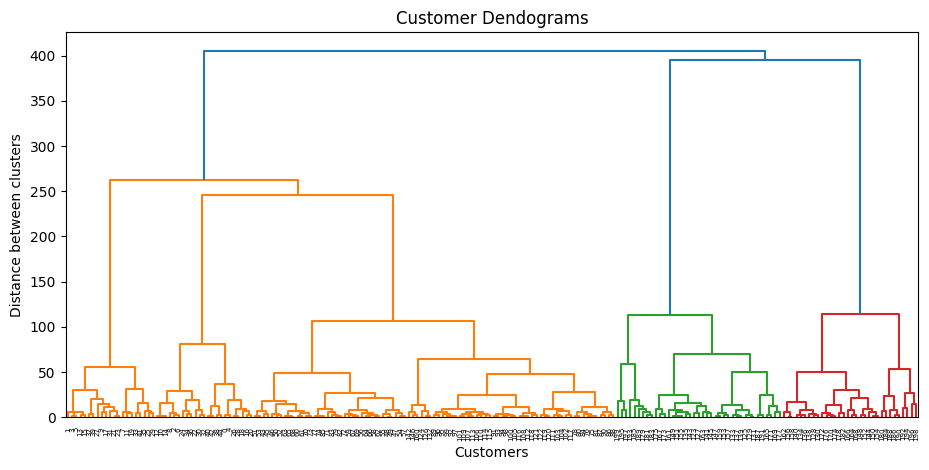

In [45]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(11, 5))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df1,'ward'))
plt.xlabel('Customers')
plt.ylabel('Distance between clusters')
plt.show()

## Remark: this suggest using a number of clusters equal to 5

__Observations:__
- Here, you can see the dendrogram for customer data.
- There are different clusters that have been created.
- Blue represents one cluster; orange represents one cluster; and the entire green represents one whole cluster.


#### __Agglomerative Hierarchical Cluster Analysis: Bottom-to-Top Approach__

Agglomerative hierarchical cluster analysis or the bottom-up approach, creates a more informative structure than flat clustering. This method doesn't require specifying the number of clusters beforehand. It starts with each data point as its own cluster and progressively merges pairs of clusters until all data points are combined into a single cluster.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/Agglomerative.png)







- Import `AgglomerativeClustering` from `sklearn.cluster`.
- Fit and predict the clusters using agglomerative clustering.
- Display the predicted cluster labels.


In [46]:
from sklearn.cluster import AgglomerativeClustering

In [47]:
# Declare
model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

In [48]:
# Fit
model.fit(df1)

AgglomerativeClustering(n_clusters=5)

In [49]:
# Show labels
model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [50]:
set(model.labels_)

{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)}

__Observation:__
- Here, you can see the labels.

In [51]:
df['Cluster_number'] = model.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_number
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


- Create a scatter plot of the dataset with colors corresponding to the predicted cluster labels.


Text(0, 0.5, 'Spending Score (1-100)')

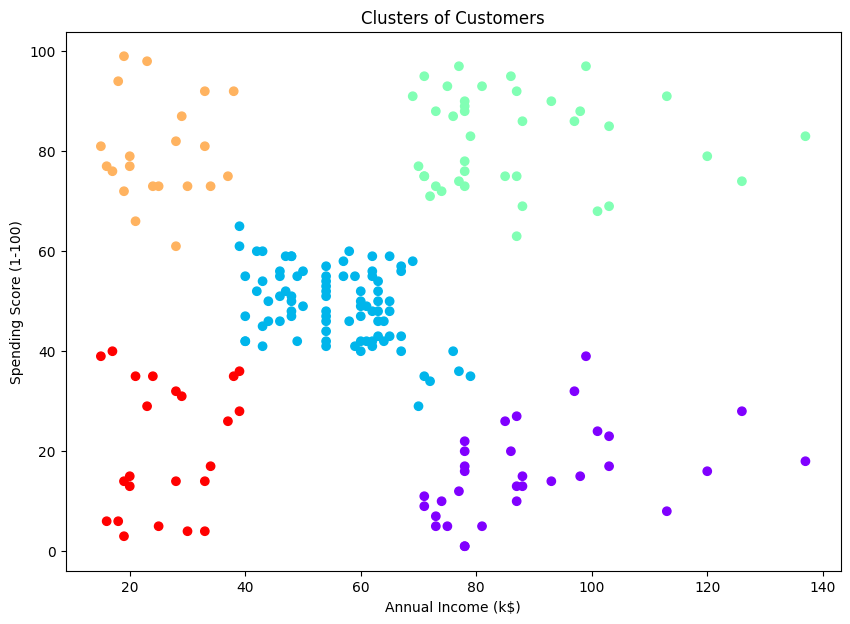

In [52]:
plt.figure(figsize=(10, 7))
plt.scatter(df1[:,0], df1[:,1], c=model.labels_, cmap='rainbow')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

__Observations:__
- Within the spread, you can see that five separate clusters have been created, forming the agglomerative cluster of five clusters.
-  The cluster is represented by red, green, blue, violet, and yellow.


#### __Divisive Hierarchical Cluster Analysis: Top-to-Bottom Approach__

This method, also called **top-down** clustering, begins with all data points in one large cluster. It then repeatedly splits this cluster into smaller sub-clusters based on their differences.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Divisive.png)



**Steps of Divisive Clustering**

1. Start with All Data in One Cluster: Begin with a single cluster containing all data points.
2. Select a Cluster to Split: Choose a cluster to split based on some criteria (e.g., the largest cluster or the one with the highest variance).
3. Split the Cluster: Divide the selected cluster into two smaller clusters using a clustering algorithm (e.g., k-means with $𝑘=2$).
4. Repeat: Repeat steps 2 and 3 until a stopping criterion is met (e.g., a specified number of clusters is reached or the clusters cannot be split further).


**Example with Diagram**

Consider a simple dataset with 6 data points in a 2-dimensional space:

(1, 2), (2, 1), (3, 3), (8, 8), (9, 9), (10, 10)
- Initial Cluster: Start with a single cluster containing all points
  - Cluster 1: {(1, 2), (2, 1), (3, 3), (8, 8), (9, 9), (10, 10)}
- First Split: Use a clustering algorithm (e.g., k-means with $𝑘=2$) to split this cluster into two clusters
  - Cluster 1.1: {(1, 2), (2, 1), (3, 3)}
  - Cluster 1.2: {(8, 8), (9, 9), (10, 10)}
- Second Split: Select one of the clusters to split further
  - Cluster 1.1.1: {(1, 2), (2, 1)}
  - Cluster 1.1.2: {(3, 3)}

At this point, you might decide to stop if the clusters are sufficiently small or if a specified number of clusters is reached.

### __6.2.4 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)__

DBSCAN is a popular unsupervised machine learning algorithm primarily used for clustering tasks, where the goal is to group closely packed data points based on some notion of distance. It identifies points that are alone in low-density regions as outliers or noise.



Below are the advantages of DBSCAN:


- It does not require specifying the number of clusters a priori, unlike K-means.
- It can find arbitrarily shaped clusters that other clustering algorithms might not find.
- It is robust to outliers; points that don’t belong to a cluster are treated as noise.


DBSCAN is widely used in various domains, such as anomaly detection, spatial data analysis, and image segmentation, due to its simplicity and effectiveness with spatial data.


Let us see the implementation of DBSCAN.

**Install Necessary Libraries**

Make sure you have the required libraries installed

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [54]:
from sklearn.cluster import DBSCAN

**Load the Dataset**

Load the `Mall_customers` dataset using pandas

In [55]:
data = pd.read_csv('./data/mall_customers.csv')

# Display the first few rows of the dataset
print(data.head())
df1 = data[['Annual Income (k$)', 'Spending Score (1-100)']]

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


**Preprocess the Data and Perform Train-test Split**

- Select relevant features for clustering. For this example, let's use `Annual Income (k$)` and `Spending Score (1-100)`
- Split the data into training and testing sets

In [56]:
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [57]:
data[['Annual Income (k$)', 'Spending Score (1-100)']].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


**Apply DBSCAN**

Apply DBSCAN to the training and testing set

DBSCAN Parameters:
 We've chosen `eps=10` and `min_samples=5`. These parameters are crucial as they determine the density requirement for forming clusters:

  `eps (epsilon)` specifies how close points must be to each other to be considered part of a cluster. It essentially defines the neighborhood around a point.

  `min_samples` determines the minimum number of points required to form a dense region, which DBSCAN treats as a cluster.

In [58]:
epsilon = 10
minimumSamples = 5

# Declare
db = DBSCAN(eps=epsilon, min_samples=5)

In [59]:
# Fit
db.fit(df1)

DBSCAN(eps=10)

In [60]:
# Show labels
db.labels_

array([ 0,  0,  1,  0,  0,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1, -1,
        1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,  2,  3, -1,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2, -1,  2,  3,
       -1,  3,  2,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [61]:
print(f"Unique values: {set(db.labels_)}")
unique_vals, counts = np.unique(db.labels_, return_counts=True)
count_map = dict(zip(unique_vals, counts))
for k,v in count_map.items():
    print(f"Cluster {k:2d}: {v:3d} points,")


Unique values: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(-1)}
Cluster -1:  17 points,
Cluster  0: 113 points,
Cluster  1:  11 points,
Cluster  2:  32 points,
Cluster  3:  27 points,


In [62]:
# Copy the data to a new variable
data_clustered = data.copy()

In [63]:
data_clustered = data.copy()
data_clustered["cluster"] = db.labels_
data_clustered.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


**Number of Clusters**

Calculate the number of clusters in training and testing sets and ignore the noice points

In [64]:
# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise = list(db.labels_).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

Estimated number of clusters: 4
Estimated number of noise points: 17


In [65]:
# Show core sample indices
data.iloc[db.core_sample_indices_]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
5,6,Female,22,17,76
6,7,Female,35,18,6
...,...,...,...,...,...
179,180,Male,35,93,90
181,182,Female,32,97,86
182,183,Male,46,98,15
183,184,Female,29,98,88


In [66]:
# Show core samples
# CODE HERE

Text(0, 0.5, 'Mean pending Score (1-100)')

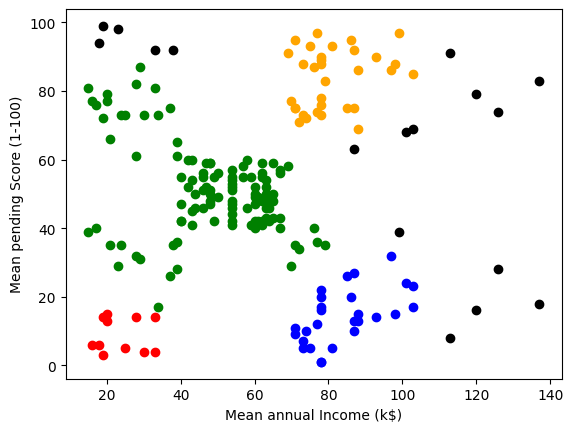

In [67]:
df0 = data_clustered[data_clustered.cluster==-1]
df1 = data_clustered[data_clustered.cluster==0]
df2 = data_clustered[data_clustered.cluster==1]
df3 = data_clustered[data_clustered.cluster==2]
df4 = data_clustered[data_clustered.cluster==3]

plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='orange')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='blue')
plt.scatter(df0['Annual Income (k$)'],df0['Spending Score (1-100)'],color='black')

plt.xlabel('Mean annual Income (k$)')
plt.ylabel('Mean pending Score (1-100)')
#plt.legend()

**Observation:**

The DBSCAN clustering algorithm identified 2 clusters in both the training and test sets, with a significant number of noise points (black dots) spread across the entire feature space. Cluster 1 is positioned around an annual income of 60k and a spending score of 60, while Cluster 2 is centered around an annual income of 60k and a spending score of 40. The presence of these two clusters in both datasets indicates that the clustering is consistent, though the majority of data points are classified as noise.